In [3]:
import os
os.chdir(r"c:\Users\rohan\Documents\Flutter Projects\saas-subscription-analytics")
os.getcwd()

'c:\\Users\\rohan\\Documents\\Flutter Projects\\saas-subscription-analytics'

In [4]:
import duckdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

con = duckdb.connect("saas.db")


In [5]:
with open("sql/31_churn_driver_analysis.sql", "r") as f:
    churn_sql = f.read()

analysis_df = con.execute(churn_sql).df()
analysis_df.head()


,account_id,churned,active_usage_days,total_usage_events,avg_usage_per_day,ticket_count,avg_resolution_time,avg_first_response_time,avg_satisfaction,subscription_count,plan_tier,mrr,seats,billing_frequency,is_trial
0,A-659280,1,55,613.0,10.216667,4,8.000000,123.750000,4.333333,12,pro,6169,62,monthly,True
1,A-3a5ad8,0,51,506.0,9.730769,4,44.750000,53.500000,4.500000,13,pro,13930,95,monthly,True
2,A-86902e,1,59,628.0,9.968254,9,40.888889,71.444444,3.500000,10,pro,12139,61,monthly,True
3,A-2e3bad,1,43,435.0,9.666667,5,31.400000,107.000000,3.500000,10,pro,12139,61,monthly,True
4,A-b2225d,1,72,696.0,9.534247,2,42.000000,38.000000,3.000000,12,pro,9353,50,monthly,True


In [6]:
analysis_df["churned"].value_counts(normalize=True)
analysis_df.isna().mean().sort_values(ascending=False)


avg_satisfaction           0.064171
ticket_count               0.013369
avg_resolution_time        0.013369
avg_first_response_time    0.013369
churned                    0.000000
active_usage_days          0.000000
account_id                 0.000000
total_usage_events         0.000000
avg_usage_per_day          0.000000
subscription_count         0.000000
plan_tier                  0.000000
mrr                        0.000000
seats                      0.000000
billing_frequency          0.000000
is_trial                   0.000000
dtype: float64

In [7]:
analysis_df.groupby("churned")[[
    "active_usage_days",
    "total_usage_events",
    "avg_usage_per_day",
    "ticket_count",
    "avg_resolution_time",
    "avg_satisfaction",
    "mrr",
    "seats"
]].mean()


,active_usage_days,total_usage_events,avg_usage_per_day,ticket_count,avg_resolution_time,avg_satisfaction,mrr,seats
churned,,,,,,,,
0,47.689189,495.378378,10.017781,4.172414,36.24676,3.970291,7595.310811,57.216216
1,48.046667,498.828333,10.012065,4.028668,35.99305,3.960609,7560.843333,59.883333


In [8]:
numeric_cols = analysis_df.select_dtypes("number")
numeric_cols.corr()["churned"].sort_values()


ticket_count              -0.032174
avg_resolution_time       -0.008849
avg_satisfaction          -0.006511
avg_usage_per_day         -0.004899
avg_first_response_time   -0.004256
mrr                       -0.002836
subscription_count        -0.002162
total_usage_events         0.008003
active_usage_days          0.008890
seats                      0.039885
churned                    1.000000
Name: churned, dtype: float64

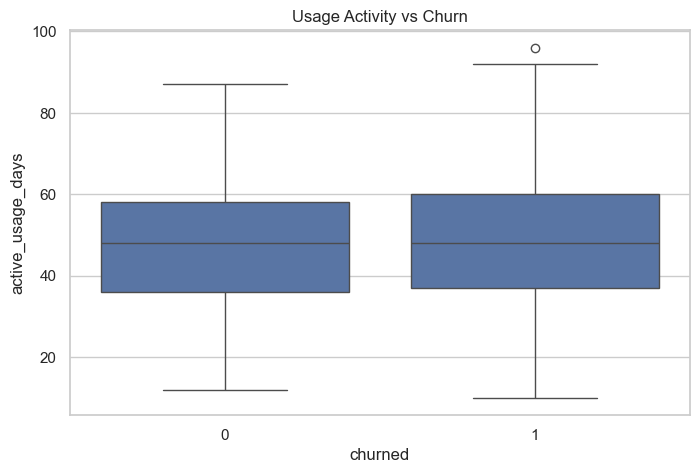

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=analysis_df, x="churned", y="active_usage_days")
plt.title("Usage Activity vs Churn")
plt.show()
